In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

#df=pd.read_excel('restaurants.xlsx')

In [2]:
df = pd.read_excel('restaurant_info_6Districts_Ju.xlsx')

<h1>DATA CLEAN

In [3]:
#remove titles
offender_index = df[df['happy']=="happy"].index
df= df.drop(offender_index)

#remove asia miles
asia_miles_index = df[df['food_type'].str.contains("eligible transactions")].index
df= df.drop(asia_miles_index)
df = df.reset_index()
df = df.drop('index',axis=1)

In [4]:
#drop duplicate entries with same name and location
df.drop_duplicates(subset=['name', 'location'], keep='last',inplace = True)

In [5]:
#change columns to float type
df['happy'] = df['happy'].astype(float)
df['sad'] = df['sad'].astype(float)
df['bookmark'] = df['bookmark'].astype(float)

In [6]:
#enable sort by price
df['price'] = pd.Categorical(df['price'], ['Below $50','$51-100', '$101-200', '$201-400', '$401-800', 'Above $801'])

In [7]:
#insert additional column of pure numeric prices
df['price_int'] = df['price'].replace({"Below $50":25,"$51-100":75,"$101-200":150,"$201-400":300,"$401-800":600,"Above $801":1000})


In [8]:
#define which food type to search
restaurant_type = ['Japanese','Western','Hong Kong Style','Guangdong','International','Taiwan','Korean','Thai','Italian','Sichuan']
restaurant_type_regex = "Japanese|Western|Hong Kong Style|Guangdong|International|Taiwan|Korean|Thai|Italian|Sichuan"

In [9]:
#define locations
Places = ['Causeway Bay','Central',"Yuen Long","Tsuen Wan","Tsim Sha Tsui","Mong Kok"]

In [10]:
#filter out restaurants who are in the majority
df = df[df['food_type'].str.contains(restaurant_type_regex)]
df.reset_index(inplace = True)
df = df.drop('index',axis=1)

In [11]:
#give food type a number
food_model = OrdinalEncoder()
test = pd.DataFrame(food_model.fit_transform(df[['food_type']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"food_int"})
df.shape

(1180, 10)

In [12]:
#give location type a number
location_model = OrdinalEncoder()
test = pd.DataFrame(location_model.fit_transform(df[['location']]))

df = pd.concat([df,test],axis=1,join='inner')
df = df.rename(columns={0:"location_int"})
df.shape

(1180, 11)

In [45]:
#introduce happy vs sad column
df['happy_vs_sad'] = df['happy']/df['sad']
df['happy_vs_sad'] = np.where(df['happy_vs_sad'] == np.inf, df['happy'], df['happy_vs_sad'])


<h1>USEFUL VISUALIZATION TOOLS

In [14]:
def bar_chart(column,x_axis = "variables",title = "graph of X",y_axis = "number of X"): #draws bar chart, input one array
    x = column.value_counts(sort=False).index
    y = column.value_counts(sort=False)

    fig = plt.figure(figsize = (10, 5))

    # creating the bar plot
    plt.bar(x, y, color ='orange',
            width = 0.4)

    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.show()

In [15]:
def scatter_graph(x,y,title): #draws a scatter graph, input two arrays
    m, b = np.polyfit(x, y, 1)
    plt.scatter(x, y, alpha=0.7)
    try:
        plt.plot(x, m*x + b)
    except:
        None
        
    try:
        #plt.title("{} vs {}".format(y.name, x.name))
        plt.xlabel(x.name)
        plt.ylabel(y.name)
    except:
        #plt.title("Title")
        plt.xlabel("X-Axis")
        plt.ylabel("Y-Axis")
    plt.title(title)
    plt.show()
    print("y intercept: ", b)

In [16]:
def find_average(df): #returns sad, happy, bookmark, price_int
    print("Average sad is: ",df['sad'].mean())
    print("Average happy is: ",df['happy'].mean())
    print("Average bookmark is: ",df['bookmark'].mean())
    print("Average price is: ",df['price_int'].mean())
    print("------------------ \n")
    return df['sad'].mean(),df['happy'].mean(),df['bookmark'].mean(),df['price_int'].mean()

In [17]:
def scatter_matrix(df,columns = ['price','bookmark','happy','sad','happy_vs_sad'], dot_size = 30, fig_size = (20,20)):
    visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', s=dot_size,  figsize=fig_size)

In [18]:
def color_scatter_matrix(df,food_or_loc,  columns = ['location_int','price_int','bookmark','happy','sad'], dot_size = 30, fig_size = (20,20)):
     
    if food_or_loc == 'food':
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['food_int'] , s=dot_size,  figsize=fig_size)
        
    
    else: 
        visual = pd.plotting.scatter_matrix(df[columns],marker = 'o', c=df['location_int'] , s=dot_size,  figsize=fig_size)


In [19]:
def legend(food_loc): #finds legend for color_scatter_matrix

    if food_loc == 'food':
        base_tags = pd.DataFrame(list(range(df['food_int'].nunique())))
        plt.imshow([np.unique(df['food_int'])])
        plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
    else:
        base_tags = pd.DataFrame(list(range(df['location_int'].nunique())))
        plt.imshow([np.unique(df['location_int'])])
        plt.xticks(ticks=np.unique(df['location_int']),labels=location_model.inverse_transform(base_tags))

In [26]:
def density_graph(a,b,df):
    sns.jointplot(a, b, 
              data=df, kind="kde")
    plt.show()
    
def scatter_bar(a,b,df):
    sns.jointplot(a, b, 
              data=df, kind="reg")
    plt.show()

In [42]:
def pair_plot(df,variable):
    sns.pairplot(df, hue=variable, height=1.8)
    plt.show()

<h1> Conduct Analysis

Causeway Bay


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


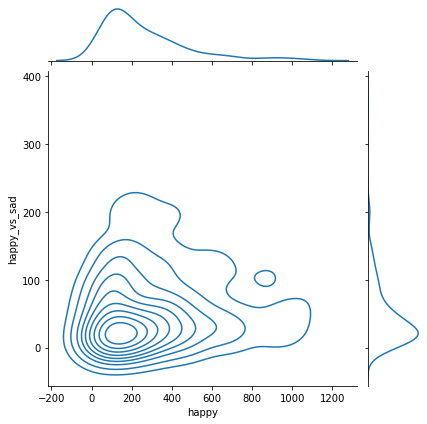

Central


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


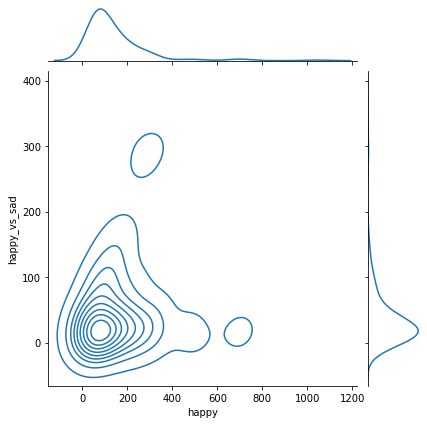

Yuen Long


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


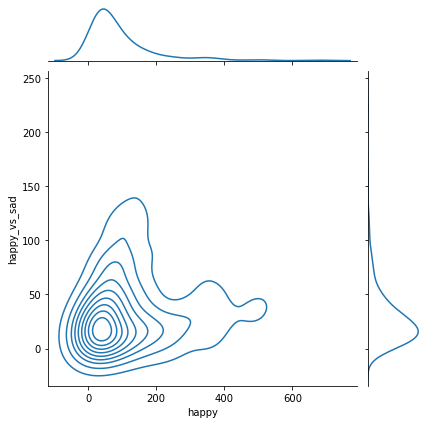

Tsuen Wan


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


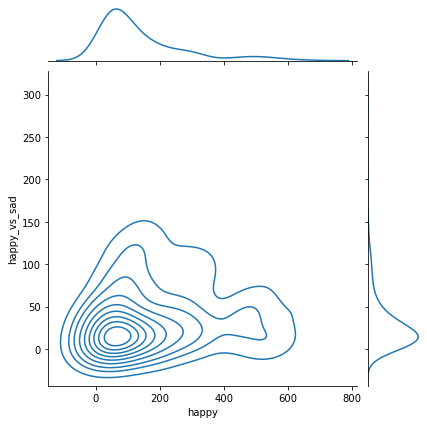

Tsim Sha Tsui


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


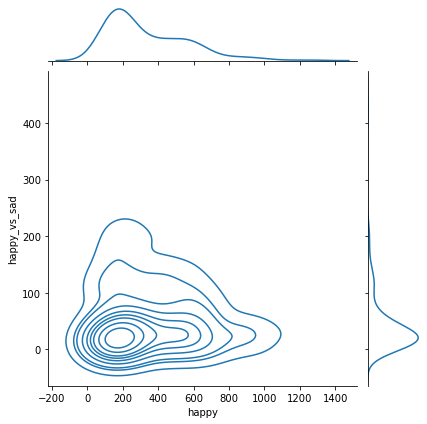

Mong Kok


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


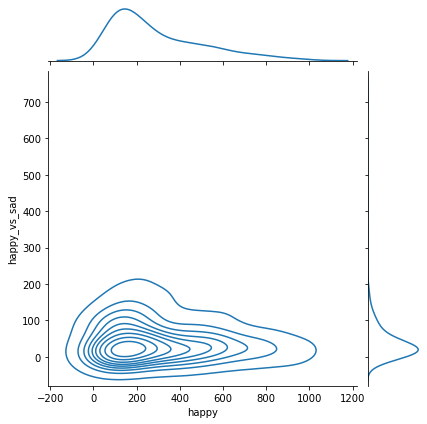

In [48]:
for i in Places:
    print(i)
    density_graph("happy","bookmark",df[df['location']==i])
#df[df['location']=="Central"].sort_values(by='happy', ascending = False)

Causeway Bay


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


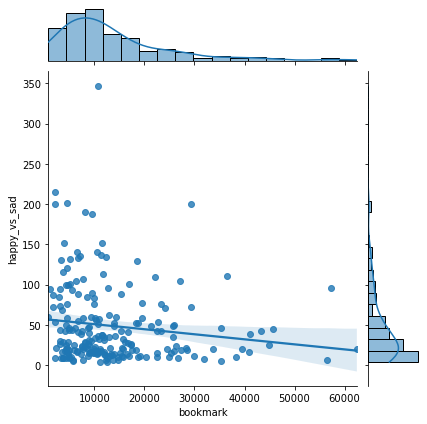

Central


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


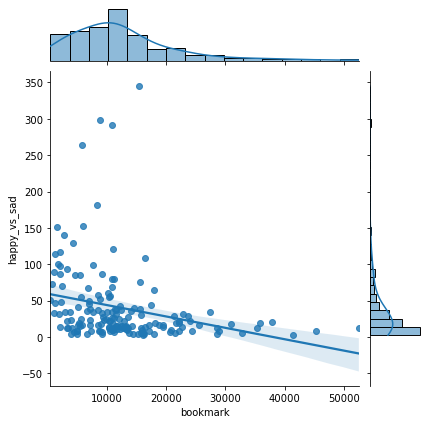

Yuen Long


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


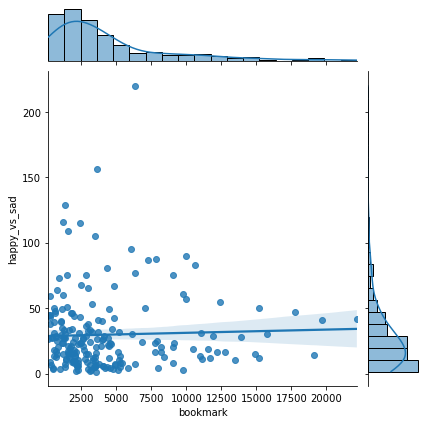

Tsuen Wan


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


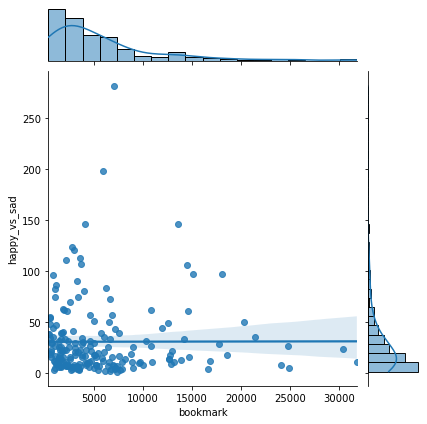

Tsim Sha Tsui


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


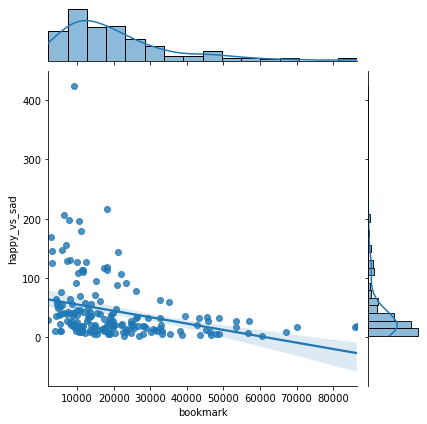

Mong Kok


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


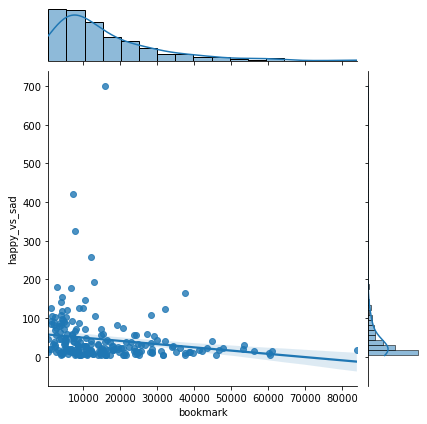

In [50]:
for i in Places:
    print(i)
    scatter_bar("bookmark","happy_vs_sad",df[df['location']==i])

Causeway Bay


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: 

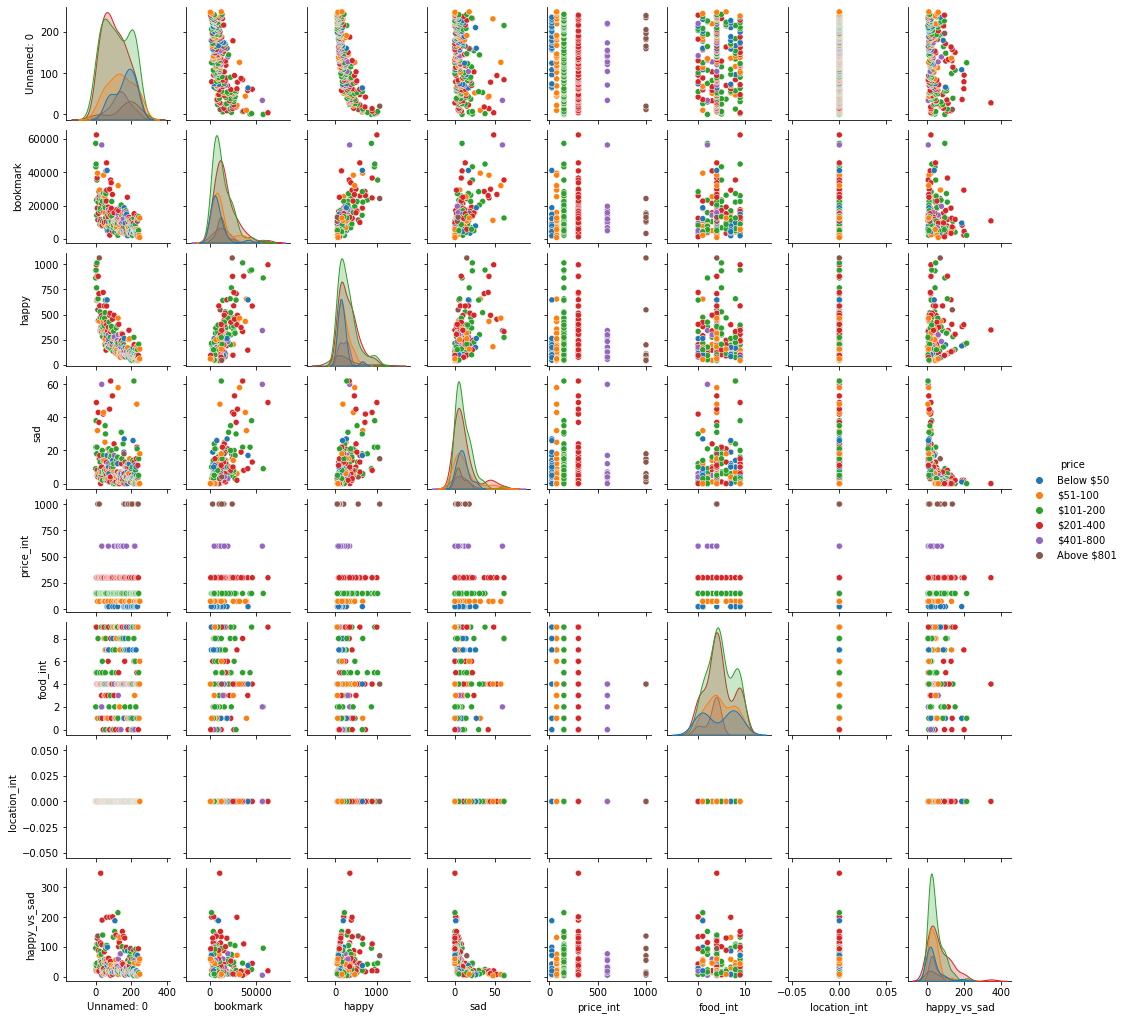

Central


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: 

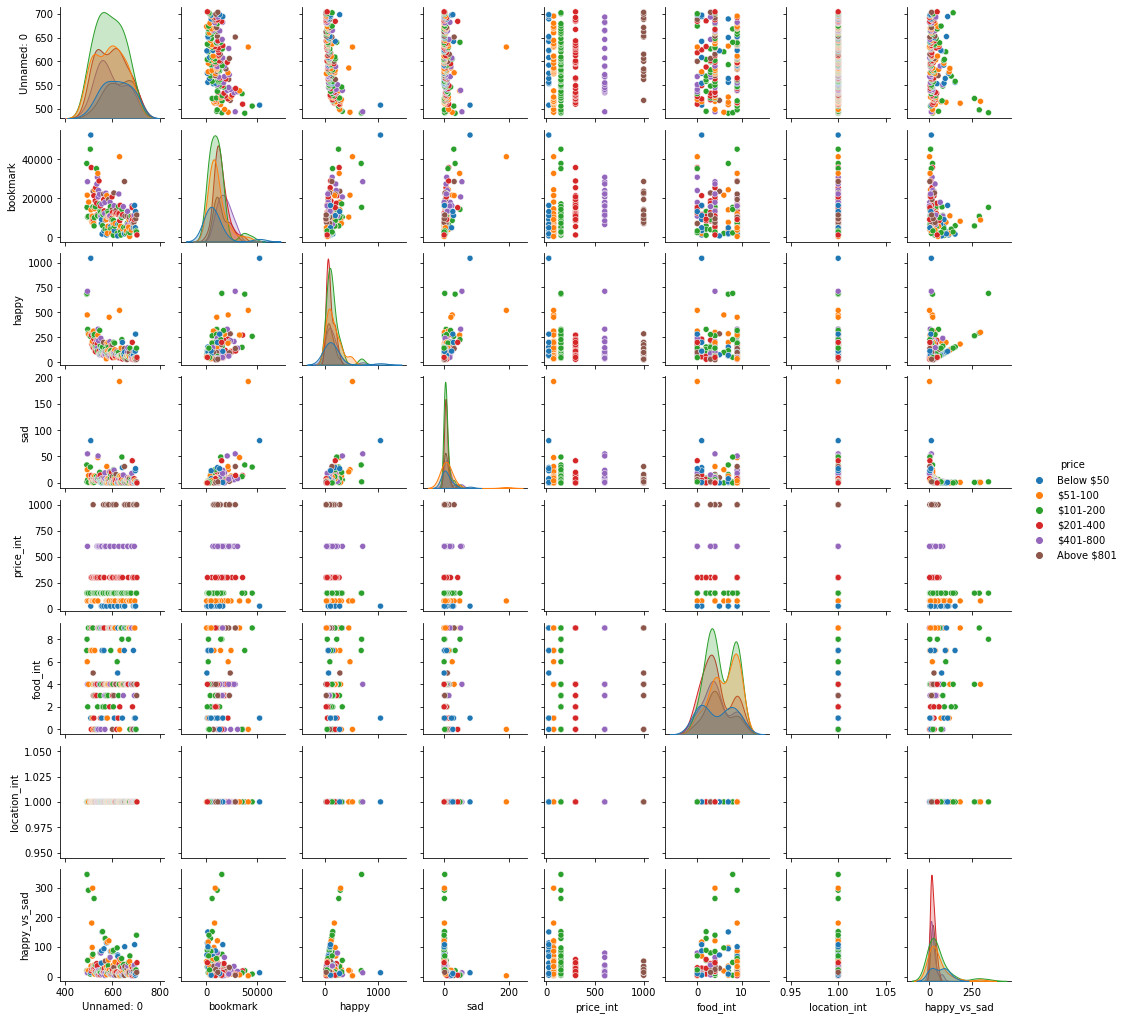

Yuen Long


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: 

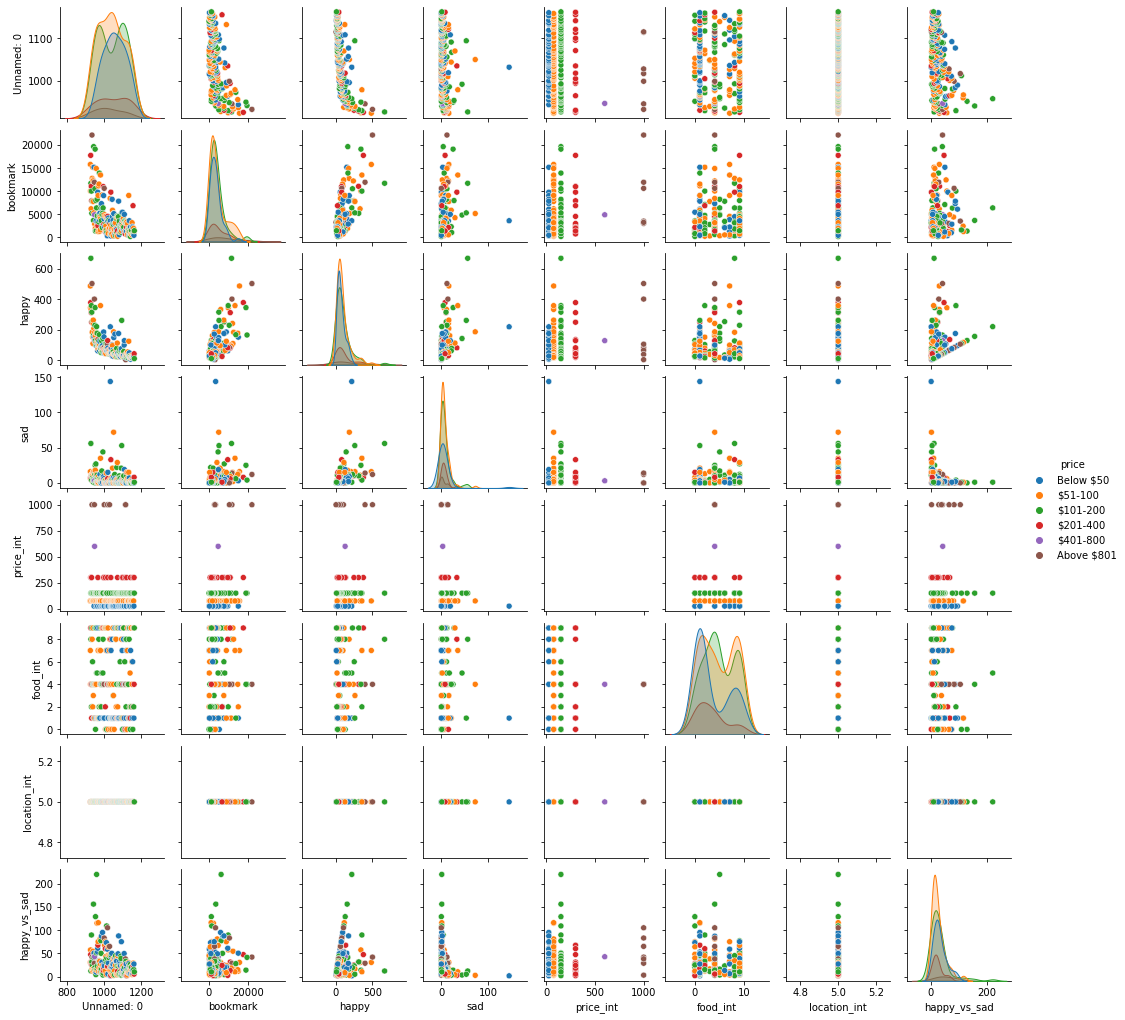

Tsuen Wan


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: 

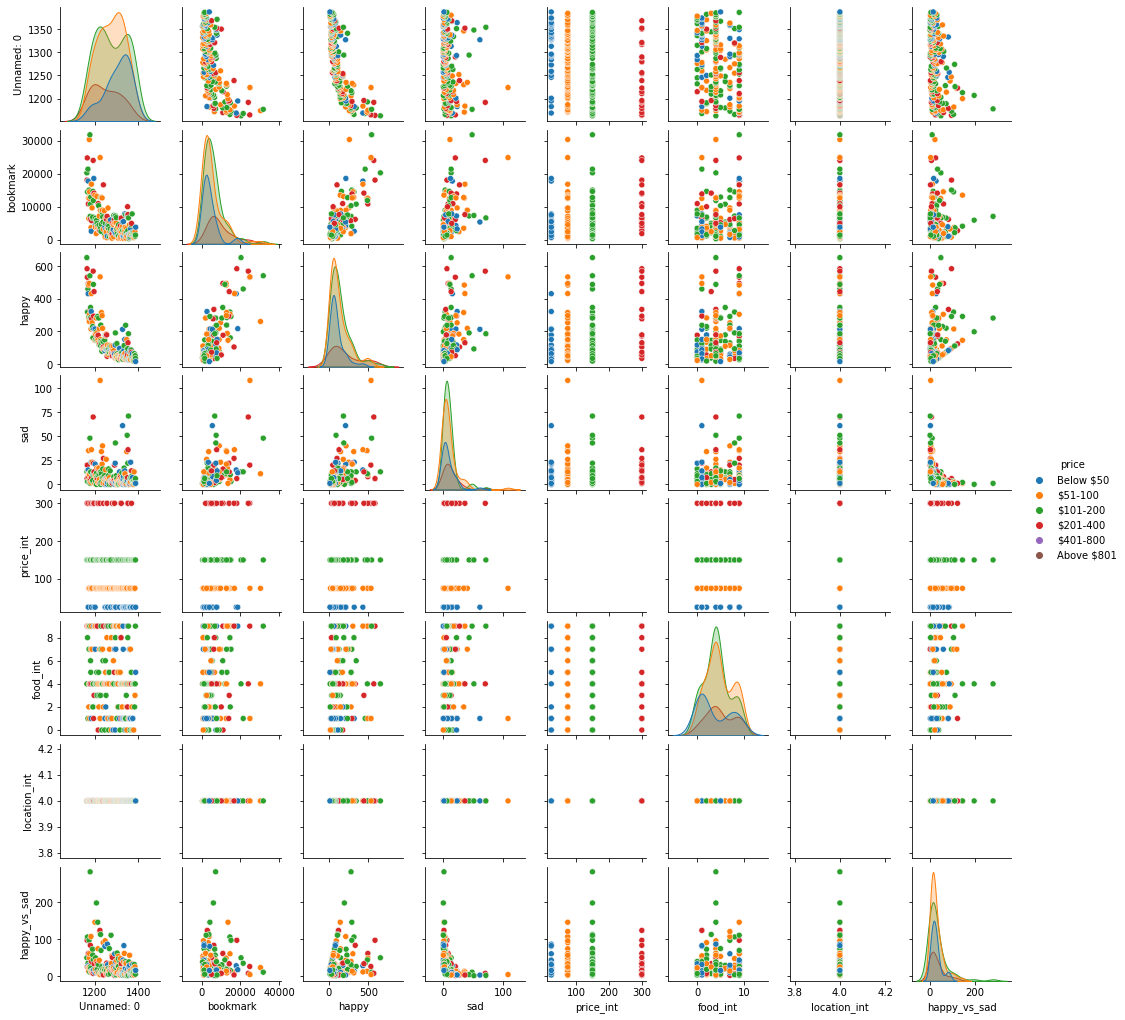

Tsim Sha Tsui


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: 

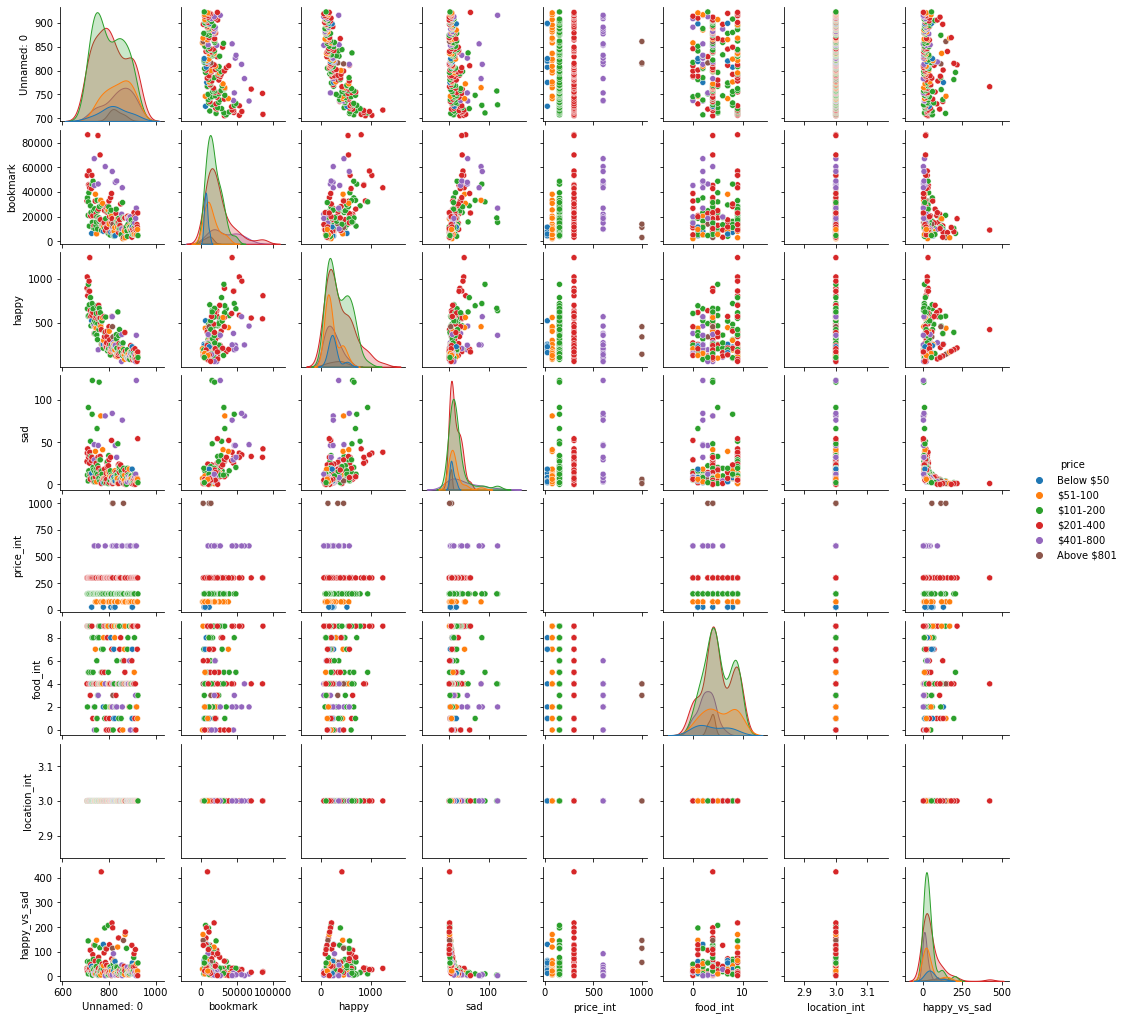

Mong Kok


/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/Users/Jacky/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:306: 

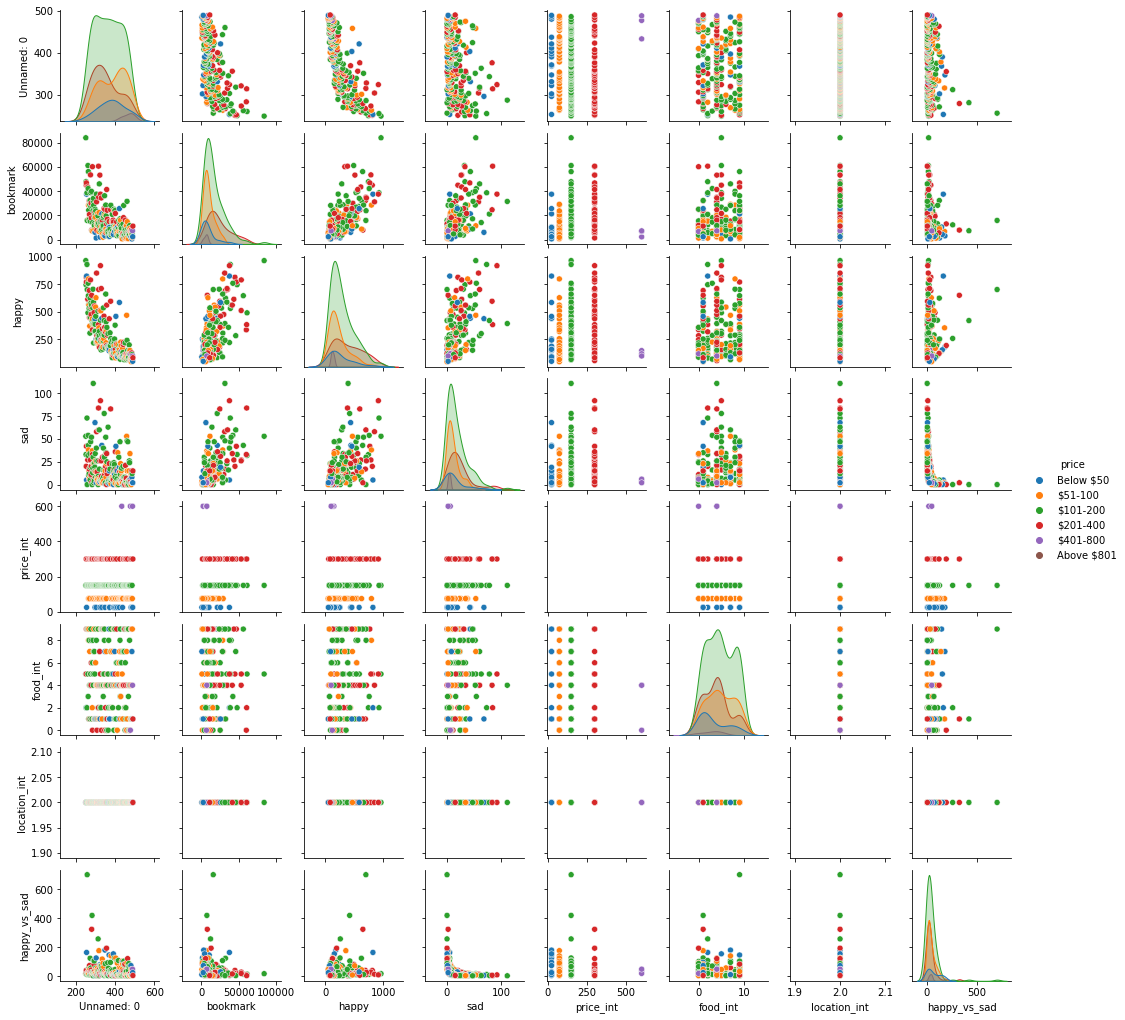

In [47]:
for i in Places:
    print(i)
    pair_plot(df[df['location']==i],"price")


In [20]:
#df['food_type'].unique()

In [21]:
#top 200 restaurants ranked by happy
top_200 = df.sort_values('happy',ascending=False).iloc[0:200]
print("For top 200 restaurants: \n ------------------")
find_average(top_200)

For top 200 restaurants: 
 ------------------
Average sad is:  28.305
Average happy is:  578.905
Average bookmark is:  26899.045
Average price is:  220.75
------------------ 



(28.305, 578.905, 26899.045, 220.75)

In [22]:
for i in Places:
    print("For {} \n------------------".format(i))
    find_average(df[df['location']==i])

For Causeway Bay 
------------------
Average sad is:  10.712264150943396
Average happy is:  260.5518867924528
Average bookmark is:  13536.646226415094
Average price is:  235.61320754716982
------------------ 

For Central 
------------------
Average sad is:  9.575757575757576
Average happy is:  141.45454545454547
Average bookmark is:  12482.963636363636
Average price is:  290.90909090909093
------------------ 

For Yuen Long 
------------------
Average sad is:  6.610576923076923
Average happy is:  92.26442307692308
Average bookmark is:  4270.125
Average price is:  138.58173076923077
------------------ 

For Tsuen Wan 
------------------
Average sad is:  9.595854922279793
Average happy is:  139.1865284974093
Average bookmark is:  5802.378238341969
Average price is:  121.24352331606218
------------------ 

For Tsim Sha Tsui 
------------------
Average sad is:  18.11111111111111
Average happy is:  336.18333333333334
Average bookmark is:  20435.51111111111
Average price is:  246.5277777777

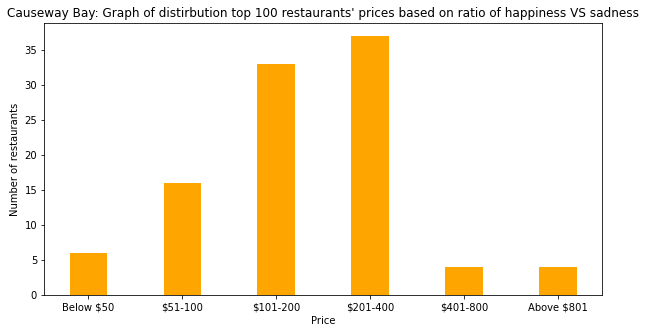

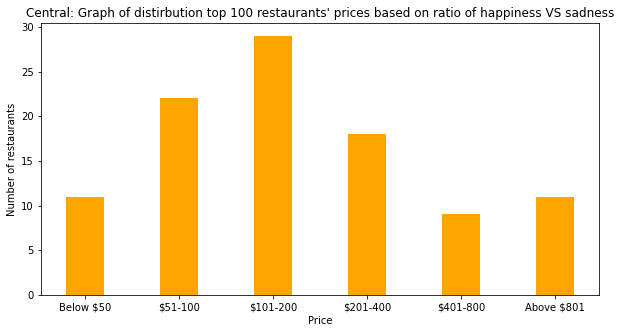

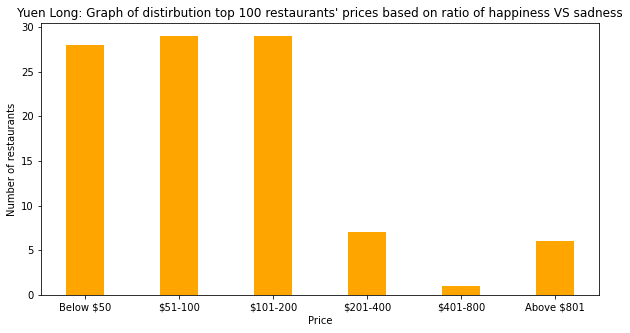

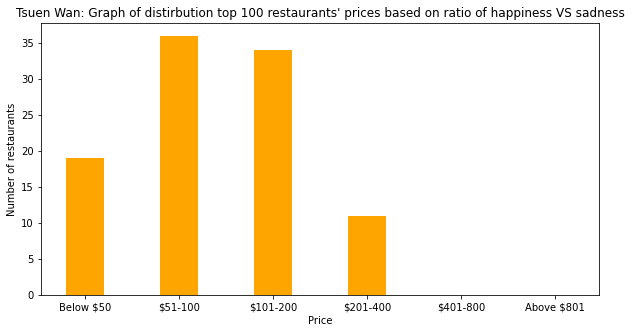

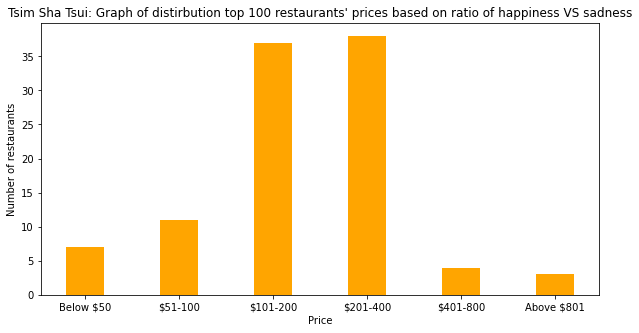

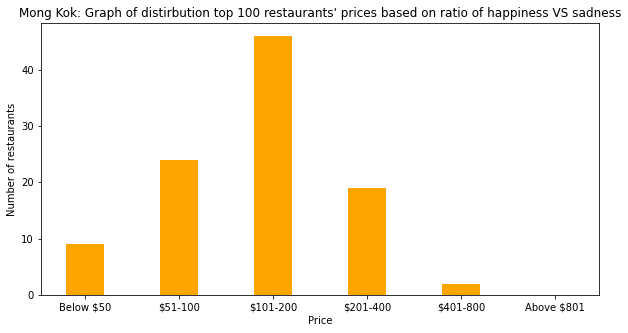

In [23]:
#Top 100 restaurant based on happy/sad ratio, group by prices
for i in Places:
    bar_chart(df[df['location']==i].sort_values("happy_vs_sad",ascending=False).iloc[0:100]['price'], "Price","{}: Graph of distirbution top 100 restaurants' prices based on ratio of happiness VS sadness".format(i), "Number of restaurants")

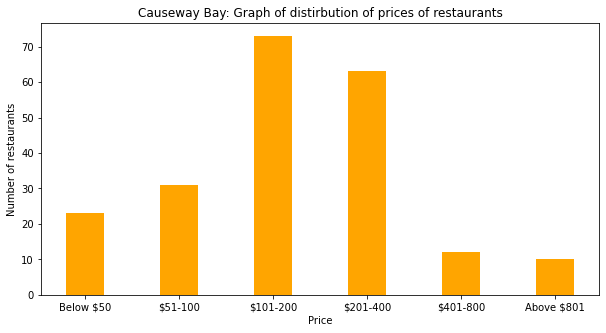

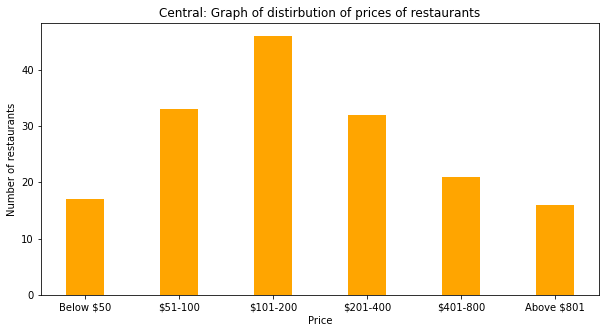

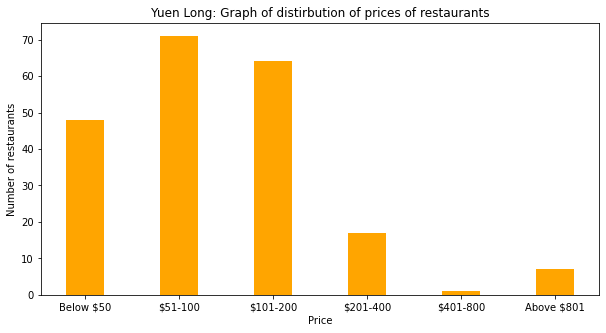

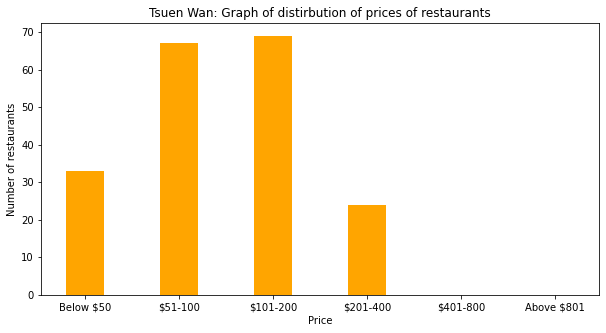

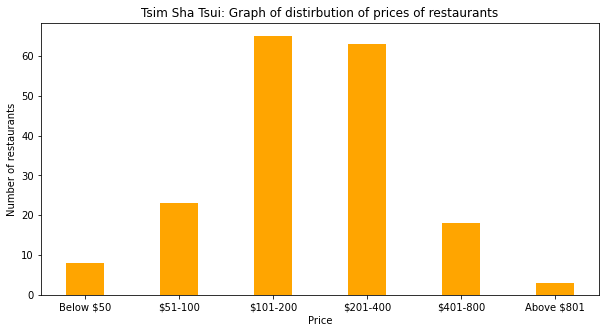

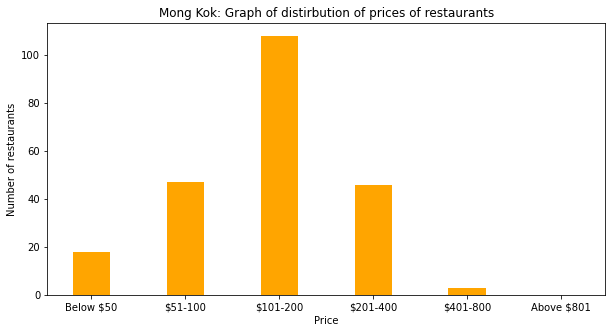

In [30]:
#Group restaurants based on region and prices

for i in Places:
    bar_chart(df[df['location']==i]['price'], "Price","{}: Graph of distirbution of prices of restaurants".format(i), "Number of restaurants")

In [25]:
#find average price in HK
for i in Places:
    print("Average price of a meal in {}:".format(i),df[df['location']==i]['price_int'].mean())

Average price of a meal in Causeway Bay: 235.61320754716982
Average price of a meal in Central: 290.90909090909093
Average price of a meal in Yuen Long: 138.58173076923077
Average price of a meal in Tsuen Wan: 121.24352331606218
Average price of a meal in Tsim Sha Tsui: 246.52777777777777
Average price of a meal in Mong Kok: 161.14864864864865


In [26]:
#find average price of meal in area
for i in Places:
    lowest = 10000000
    highest = 0
    restaurant_low = "error"
    restaurant_high = "error"
    for k in restaurant_type:
        mean_price = df.loc[(df['food_type']==k) & (df['location']==i)]['price_int'].mean()
        if mean_price < lowest:
            restaurant_low = k
            lowest = mean_price
        if mean_price > highest:
            restaurant_high = k
            highest = mean_price
        print("Average price of a {} meal in {}:".format(k,i),mean_price)
    print("-------------------------")
    print("Cheapest food is: {} meal, costing {}".format(restaurant_low, lowest))
    print("Most expensive food is: {} meal, costing {}".format(restaurant_high, highest))
    print("-------------------------")
    print("")

Average price of a Japanese meal in Causeway Bay: 352.36486486486484
Average price of a Western meal in Causeway Bay: 191.1290322580645
Average price of a Hong Kong Style meal in Causeway Bay: 120.83333333333333
Average price of a Guangdong meal in Causeway Bay: 263.3333333333333
Average price of a International meal in Causeway Bay: 193.75
Average price of a Taiwan meal in Causeway Bay: 85.9375
Average price of a Korean meal in Causeway Bay: 177.27272727272728
Average price of a Thai meal in Causeway Bay: 125.0
Average price of a Italian meal in Causeway Bay: 262.5
Average price of a Sichuan meal in Causeway Bay: 215.625
-------------------------
Cheapest food is: Taiwan meal, costing 85.9375
Most expensive food is: Japanese meal, costing 352.36486486486484
-------------------------

Average price of a Japanese meal in Central: 373.9130434782609
Average price of a Western meal in Central: 258.16326530612247
Average price of a Hong Kong Style meal in Central: 102.08333333333333
Average

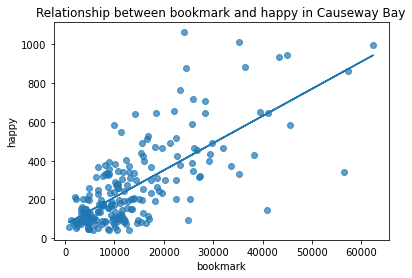

y intercept:  71.2065893317795


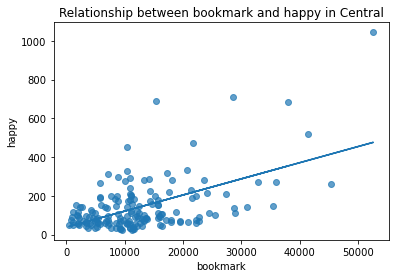

y intercept:  37.213567333559226


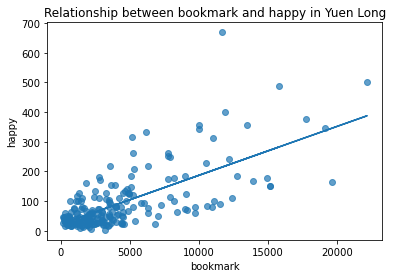

y intercept:  21.854565431541772


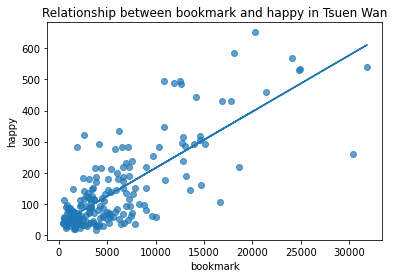

y intercept:  33.99852773281593


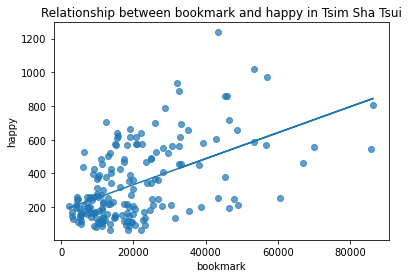

y intercept:  178.72139601767813


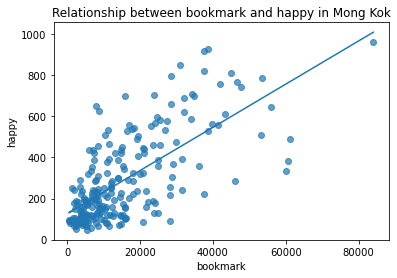

y intercept:  125.69018950700718


In [27]:
#Find relationship of bookmarks VS happy
for i in Places:
    scatter_graph(df.loc[(df['location']==i)]['bookmark'],df.loc[(df['location']==i)]['happy'],"Relationship between bookmark and happy in {}".format(i))

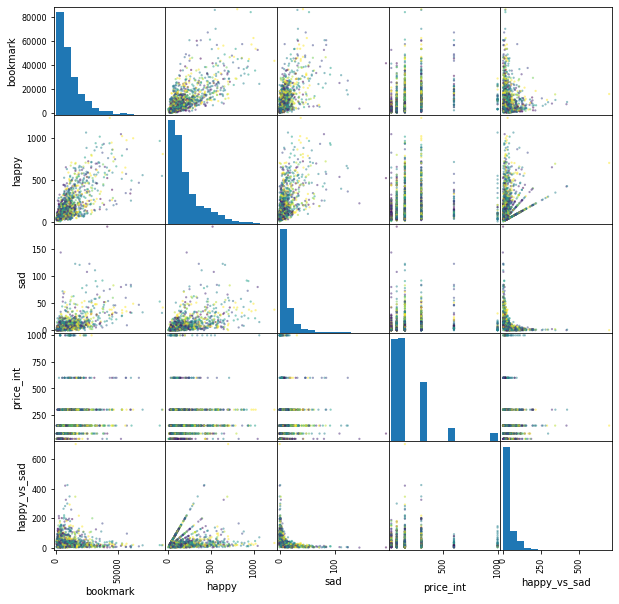

In [28]:
visual = pd.plotting.scatter_matrix(df[['bookmark','happy','sad','price_int','happy_vs_sad']],c=df['food_int'],marker = 'o', s=5, hist_kwds={'bins':15}, figsize=(10,10))


([<matplotlib.axis.XTick at 0x7ff8fd60cc10>,
 [Text(0.0, 0, "['Guangdong']"),
  Text(1.0, 0, "['Hong Kong Style']"),
  Text(2.0, 0, "['International']"),
  Text(3.0, 0, "['Italian']"),
  Text(4.0, 0, "['Japanese']"),
  Text(5.0, 0, "['Korean']"),
  Text(6.0, 0, "['Sichuan']"),
  Text(7.0, 0, "['Taiwan']"),
  Text(8.0, 0, "['Thai']"),
  Text(9.0, 0, "['Western']")])

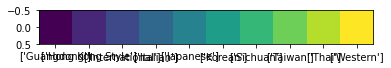

In [29]:
#maps color to legend
base_tags = pd.DataFrame({0,1,2,3,4,5,6,7,8,9})
#model.inverse_transform(base_tags)

plt.imshow([np.unique(df['food_int'])])
plt.xticks(ticks=np.unique(df['food_int']),labels=food_model.inverse_transform(base_tags))
#_ = plt.xticks(ticks=np.unique(df['food']),labels=model.inverse_transform(base_tags))